## Ejercicio 1

Implementar método implicito de Euler

In [1]:
# Primero definimos la función que nos da la lista de elementos de nuestra partición en función t0, tf y h

function listt(t0,tf,h)
    
    listt = linspace(t0,tf,Int(round((tf-t0)/h)))
    
    return listt
end

listt (generic function with 1 method)

In [2]:
# Definimos una función para el método de Newton para encontrar la raiz de una función para posteriormente usarlo en el método de Euler implícito

function newton(f,df,x0,listt)
    
    # Número de iteraciones según lo permite la cantidad de elementos en nuestra lista de valores de t_k
    n = Int(length(listt))
    
    # Condición inicial
    x = x0
    
    # Método de Newton
    for i in 1:50
        
        x = x - f(x)/(df(x))
        
    end
    return x
end

newton (generic function with 1 method)

In [3]:
# Definimos una fucnión para el método de Euler implícito

function metodo_euler_imp(f,df,x0,listt)
       
    listx = zeros(length(listt)) # Lista vacía que contendrá los elementos x(t_k)
    h = listt[2] - listt[1]
    
    # Condición inicial
    x = x0 
    
    # Introducimos nuestra condición inicial x0 como el primer elemento en la lista listx
    listx[1] = x0
    
    for i in 2:length(listt)
        
        # La función cuya raíz queremos encontrar es g(x) = x - listx[i-1] - hf(listt[i],x) para i=2,...,n. Entonces definimos g y dg en función de f y df respectivamente. 
        g(x) = x - listx[i-1] - h*f(listt[i],x)
        dg(x) = 1 - h*df(listt[i],x)
        
        # Con estas funciones g y dg usamos la función del método de Newton para encontrar listx[i] = x.
        x = newton(g,dg,listx[i-1],listt[i])
        listx[i] = x
        
    end
    return listt,listx
end

metodo_euler_imp (generic function with 1 method)

El método se probará más adelante en el ejercicio 5.

## Ejercicio 2

Implementar Euler: Regla del punto medio.

El método se escribe de la forma: $$x_{n+1}=x_n+hf\left(t_{n+1/2}, x_n+\frac{h}{2}f(t_n,x_n)\right).$$

In [4]:
# Definimos la función del método de punto medio

function metodo_punto_medio(f,x0,listt)
    
    listx = zeros(length(listt)) # Lista vacía que contendrá los elementos x(t_k)
    h = listt[2] - listt[1]
    
    # Condición inicial
    x = x0 
    
    # Introducimos nuestra condición inicial x0 como el primer elemento en la lista listx
    listx[1] = x0
    
    for i in 2:length(listt)
        
    x = x + h*f(listt[i-1] + h/2,x + h*f(listt[i-1], listx[i-1])/2)
    listx[i] = x
        
    end
    return listt,listx
end

metodo_punto_medio (generic function with 1 method)

Probemos el método con la siguiente ecuación diferencial: $$\frac{dx}{dt}=- x, x(0)=1 \text{ y } t\in(0,8).$$

In [5]:
# Definimos la función que caracteriza nuestra ecuación diferencial:

f(t,x) = -x

f (generic function with 1 method)

In [6]:
# Creamos nuestra lista con valores t_k para un valor h dado:

A1 = listt(0,8,1)
A2 = listt(0,8,0.5)
A3 = listt(0,8,0.1)

0.0:0.10126582278481013:8.0

In [7]:
# Evaluamos la función en las listas con valores t_k para cada h dado:

B1 = metodo_punto_medio(f,1,X1)
B2 = metodo_punto_medio(f,1,X2)
B3 = metodo_punto_medio(f,1,X3)

LoadError: [91mUndefVarError: X1 not defined[39m

In [8]:
using PyPlot

In [9]:
# Graficamos las aproximaciones a x(t) usando la regla del punto medio para diferentes valores de h

# Aproximaciones
plot(B1[1],B1[2], label="h=0.1")
plot(B2[1],B2[2], label="h=0.05")
plot(B3[1],B3[2], label="h=0.01")

# Solución real
plot(Y3[1],exp.(-Y3[1]), label="exp(-t)")

title("Aproximación de la regla del punto medio para diferentes valores de h con x(0)=1")
xlabel("t")
ylabel("x(t)")

grid("on")
legend()

LoadError: [91mUndefVarError: B1 not defined[39m

## Ejercicio 3

Implementar método de Runge-Kutta de orden 4.

El método se escribe como sigue:
$$ x_{n+1}=x_n+\frac{h}{6}\left( k_1+2 k_2+2 k_3 +k_4 \right),$$
donde:
\begin{align*}
k_1&=f(t_n,x_n),\\
k_2&=f(t_{n+1/2},x_n+\frac{h}{2}k_1),\\
k_3&=f(t_{n+1/2},x_n+\frac{h}{2}k_2),\\
k_4&=f(t_n + h,x_n+h k_3).\\
\end{align*}

In [10]:
function runge_kutta_4(f,x0,listt)
    
    listx = zeros(length(listt)) # Lista vacía que contendrá los elementos x(t_k)
    h = listt[2] - listt[1]
    
    # Condición inicial
    x = x0 
    
    # Introducimos nuestra condición inicial x0 como el primer elemento en la lista listx
    listx[1] = x0
    
    # Método de Runge-Kutta de orden 4
    for i in 2:length(listt)
    
        k1 = f(listt[i-1], listx[i-1])
        k2 = f(listt[i-1] + h/2, listx[i-1] + h*(k1)/2)
        k3 = f(listt[i-1] + h/2, listx[i-1] + h*(k2)/2)
        k4 = f(listt[i-1] + h, listx[i-1] + h*(k3))
    
        x = x + h*(k1 + 2*(k2) + 2*(k3) + k4)/6
        listx[i] = x
        
    end
    
    return listt,listx
end

runge_kutta_4 (generic function with 1 method)

El código anterior se probará más adelante en los ejercicios 6 y 7.

## Ejercicio 5

Repita el ejercicio 1 del notebook anterior (Julia_6) y discuta los resultados respecto a lo que obtuvo con el método implícito.

Queremos resolver la ecuación diferencial

$$\frac{dx}{dt}=-\alpha x, x(0)=1\text{ y }2, \text{ y } t\in(0,8).$$

para $\alpha = 2.5$ y $h=1.0,0.5,0.2,0.01$. 

In [11]:
# Escribimos la función que define nuestra ecuación diferencial

f(t,x) = -2.5*x

f (generic function with 1 method)

In [12]:
# Escribimos la derivada de la función que define nuestra ecuación diferencial

df(t,x) = -2.5

df (generic function with 1 method)

In [13]:
# Definimos nuestras listas con los valores de t

x1 = listt(0,8,1)
x2 = listt(0,8,0.5)
x3 = listt(0,8,0.2)
x4 = listt(0,8,0.01)

0.0:0.010012515644555695:8.0

Primero, resolvamos para la condición inicial $x(0)=1$:

In [14]:
# Evaluamos nuestras listas con valores de t en la función `metodo_euler_imp`

y1 = metodo_euler_imp(f,df,1,x1)
y2 = metodo_euler_imp(f,df,1,x2)
y3 = metodo_euler_imp(f,df,1,x3)
y4 = metodo_euler_imp(f,df,1,x4)

(0.0:0.010012515644555695:8.0, [1.0, 0.97558, 0.951756, 0.928514, 0.90584, 0.883719, 0.862139, 0.841085, 0.820546, 0.800508  …  3.29362e-9, 3.21319e-9, 3.13472e-9, 3.05817e-9, 2.98349e-9, 2.91063e-9, 2.83956e-9, 2.77021e-9, 2.70257e-9, 2.63657e-9])

Ahora, resolvamos para la condición inicial $x(0)=2$:

In [15]:
# Evaluamos nuestras listas con valores de t en la función `metodo_euler_imp`

Y1 = metodo_euler_imp(f,df,2,x1)
Y2 = metodo_euler_imp(f,df,2,x2)
Y3 = metodo_euler_imp(f,df,2,x3)
Y4 = metodo_euler_imp(f,df,2,x4)

(0.0:0.010012515644555695:8.0, [2.0, 1.95116, 1.90351, 1.85703, 1.81168, 1.76744, 1.72428, 1.68217, 1.64109, 1.60102  …  6.58724e-9, 6.42638e-9, 6.26944e-9, 6.11634e-9, 5.96698e-9, 5.82127e-9, 5.67911e-9, 5.54043e-9, 5.40513e-9, 5.27314e-9])

Para comparar con el método de Euler explícito, recordemos el código que se hizo en la tarea 11:

In [16]:
# Definimos una función para resolver  una ecuación diferencial dada por f(x,t) usando el método de Euler. Los parámetros son la función f, una condición inicial x0 = x(t0), los limites del intervalo [t0,tf] y la separación entre los elementos del intervalo h.

function metodo_euler(f,x0,listt)
    
    listx = zeros(length(listt)) # Lista vacía que contendrá los elementos x(t_k)
    
    h = listt[2]-listt[1]
    
    # Condición inicial
    x = x0 
    
    # Introducimos nuestra condición inicial x0 como el primer elemento en la lista listx
    listx[1] = x0 
    
    # Hacemos un ciclo que nos guarde los valores de la función que satisface nuestra ecuación diferencial x evaluada en los puntos t_k usando el método de euler
    
    for i in 2:length(listt)
        
        x = x + h*f(listt[i-1], listx[i-1])
        listx[i] = x
        
    end
    
    return listt,listx
    
end

metodo_euler (generic function with 1 method)

Para la condición inicial $x(0)=1$:

In [17]:
# Evaluamos nuestras listas con valores de t en la función `metodo_euler`

z1 = metodo_euler(f,1,x1)
z2 = metodo_euler(f,1,x2)
z3 = metodo_euler(f,1,x3)
z4 = metodo_euler(f,1,x4)

(0.0:0.010012515644555695:8.0, [1.0, 0.974969, 0.950564, 0.92677, 0.903572, 0.880954, 0.858903, 0.837403, 0.816442, 0.796006  …  2.00741e-9, 1.95716e-9, 1.90817e-9, 1.86041e-9, 1.81384e-9, 1.76844e-9, 1.72417e-9, 1.68101e-9, 1.63893e-9, 1.59791e-9])

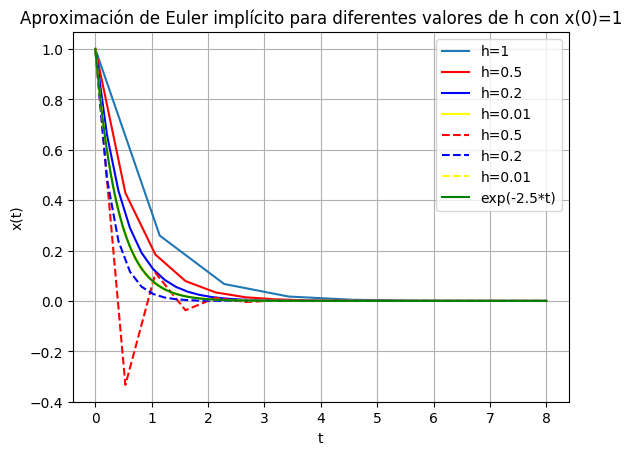

PyObject <matplotlib.legend.Legend object at 0x7f0e49316ed0>

In [18]:
# Graficando las aproximaciones a x(t) usando método de Euler implícito para diferentes valores de h

# Aproximaciones
plot(y1[1],y1[2], label="h=1")
plot(y2[1],y2[2], label="h=0.5", color="red")
plot(y3[1],y3[2], label="h=0.2", color="blue")
plot(y4[1],y4[2], label="h=0.01", color="yellow")

#plot(Z1[1],Z1[2], label="h=1", linestyle="--")
plot(z2[1],z2[2], label="h=0.5", linestyle="--", color="red")
plot(z3[1],z3[2], label="h=0.2", linestyle="--", color="blue")
plot(z4[1],z4[2], label="h=0.01", linestyle="--", color="yellow")

# Solución real
plot(Y4[1], exp.(-2.5*Y4[1]), label="exp(-2.5*t)", color="green")

title("Aproximación de Euler implícito para diferentes valores de h con x(0)=1")
xlabel("t")
ylabel("x(t)")

grid("on")
legend()

Para la condición inicial $x(0)=2$:

In [19]:
# Evaluamos nuestras listas con valores de t en la función `metodo_euler`

Z1 = metodo_euler(f,2,x1)
Z2 = metodo_euler(f,2,x2)
Z3 = metodo_euler(f,2,x3)
Z4 = metodo_euler(f,2,x4)

(0.0:0.010012515644555695:8.0, [2.0, 1.94994, 1.90113, 1.85354, 1.80714, 1.76191, 1.71781, 1.67481, 1.63288, 1.59201  …  4.01482e-9, 3.91432e-9, 3.81634e-9, 3.72081e-9, 3.62768e-9, 3.53687e-9, 3.44834e-9, 3.36202e-9, 3.27787e-9, 3.19582e-9])

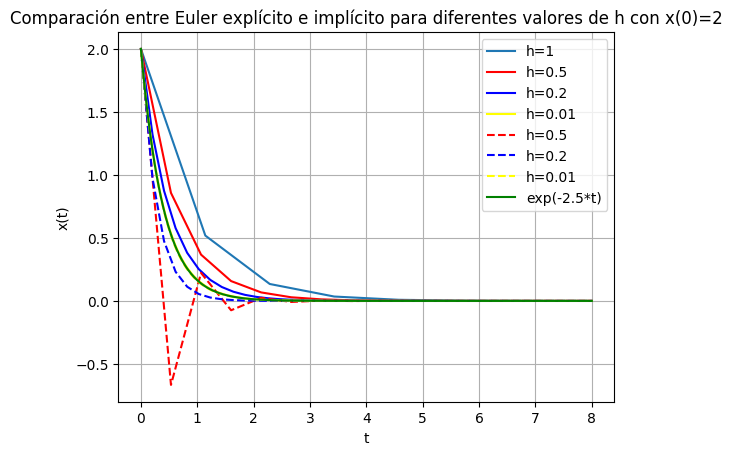

PyObject <matplotlib.legend.Legend object at 0x7f0e48fa4fd0>

In [20]:
# Graficando las aproximaciones a x(t) usando método de Euler implícito para diferentes valores de h

# Aproximaciones
plot(Y1[1],Y1[2], label="h=1")
plot(Y2[1],Y2[2], label="h=0.5", color="red")
plot(Y3[1],Y3[2], label="h=0.2", color="blue")
plot(Y4[1],Y4[2], label="h=0.01", color="yellow")

#plot(Z1[1],Z1[2], label="h=1", linestyle="--")
plot(Z2[1],Z2[2], label="h=0.5", linestyle="--", color="red")
plot(Z3[1],Z3[2], label="h=0.2", linestyle="--", color="blue")
plot(Z4[1],Z4[2], label="h=0.01", linestyle="--", color="yellow")

# Solución real
plot(Y4[1], 2*exp.(-2.5*Y4[1]), label="exp(-2.5*t)", color="green")

title("Comparación entre Euler explícito e implícito para diferentes valores de h con x(0)=2")
xlabel("t")
ylabel("x(t)")

grid("on")
legend()

Notemos que para las dos condiciones iniciales, se omitió la curva para $h=1$ del método de Euler explícito ya que el error es muy grande en comparación con los otros valores de $h$. Se observar que para un valor de $h$ dado, las curvas dadas por el método implícito son más suaves que las curvas dadas por el método explícito, lo cual indica que la aproximación es mejor. Además, las curvas dadas por el método implícito se encuentran "por encima" lo cual tiene sentido ya que para encontrar $x_k$ se usó el término $t_{k+1}$.

## Ejercicio 6

Usar el método del punto medio y de Runge-Kutta para resolver la ecuación:
$$\frac{dx}{dt}=\frac{2x-18 t}{1+t}.$$
Compare su respuesta con la solución exacta: $4+8t-5t^2$. notén que $x(0)=4$.

In [21]:
# Escribimos la función que define nuestra ecuación diferencial

g(t,x) = (2x - 18t)/(1 + t)

g (generic function with 1 method)

In [22]:
# Definimos nuestras listas con los valores de t

T1 = listt(0,6,1)
T2 = listt(0,6,0.5)
T3 = listt(0,6,0.1)

0.0:0.1016949152542373:6.0

In [23]:
# Evaluamos nuestras listas con valores de t en la función `runge_kutta_4`

F1 = runge_kutta_4(g,4,T1)
F2 = runge_kutta_4(g,4,T2)
F3 = runge_kutta_4(g,4,T3)

(0.0:0.1016949152542373:6.0, [4.0, 4.76186, 5.4203, 5.97533, 6.42693, 6.77512, 7.01989, 7.16124, 7.19917, 7.13368  …  -84.5941, -89.0032, -93.5156, -98.1315, -102.851, -107.674, -112.6, -117.629, -122.762, -127.999])

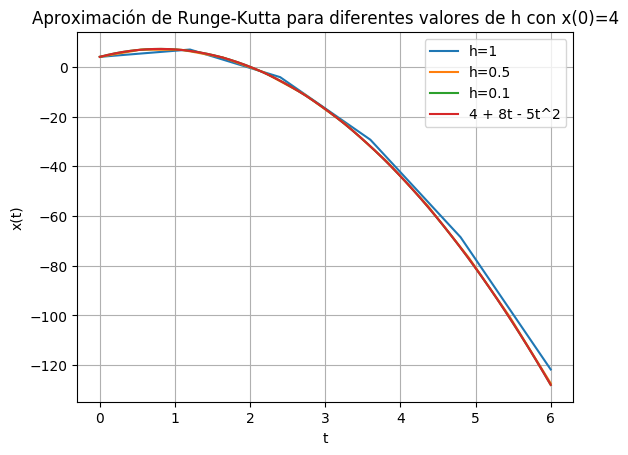

PyObject <matplotlib.legend.Legend object at 0x7f0e48e4d5d0>

In [24]:
# Graficando las aproximaciones a x(t) usando método Runge-Kutta de orden 4 para diferentes valores de h

# Aproximaciones
plot(F1[1],F1[2], label="h=1")
plot(F2[1],F2[2], label="h=0.5")
plot(F3[1],F3[2], label="h=0.1")

# Solución real
plot(F3[1], 4 + 8*F3[1] - 5*F3[1].^2, label="4 + 8t - 5t^2")

title("Aproximación de Runge-Kutta para diferentes valores de h con x(0)=4")
xlabel("t")
ylabel("x(t)")

grid("on")
legend()

Solo se alcanza distinguir la aproximación para $h=1$ de la solución real en este intervalo.

## Ejercicio 7

Grafique la energía total del oscilador harmonico usando los métodos explícito de Euler y Runge-Kutta de orden 4. Compare sus respuestas y discuta.

 Por lo hecho en la tarea anterior, sabemos que la solución es de la forma: $$ x(t) = \frac{x'_0}{\omega}\sin(\omega t) + x_0 \cos(\omega t)$$ donde $x_0 = x(x_0)$ y $x'_0 = x'(x_0)$. Resolvamos el sistema de ecuaciones para el intervalo $[0,2\pi]$, $k=1$, $m=1$ e imponemos las condiciones inciales $x(0)=0$ y $u(0)=x'(0)=1$. Con esto, se tiene que $\omega=1$ y 

$$ x(t) = \sin(t)$$
$$ u(t) = x'(t) = \cos(t)$$

In [25]:
# Definimos nuestra función del método de Runge-Kutta de orden 4 para una sistema de dos ecuaciones:

function runge_kutta_4_2(f,g,x0,u0,listt)
    
    listx = zeros(length(listt)) # Lista vacía que contendrá los elementos x(t_k)
    listu = zeros(length(listt)) # Lista vacía que contendrá los elementos u(t_k)
    h = listt[2] - listt[1]
    
    # Condiciones iniciales
    x = x0
    u = u0
    
    # Introducimos nuestra condiciones iniciales x0 y u0 como los primeros elementos en las listas listx y listu respectivamente
    listx[1] = x0
    listu[1] = u0
    
    for i in 2:length(listt)
    
    # Suponiendo que f,g dependen de t, x y u. Además, los valores k1, k2, k3 y k4 corresponden a la función f, que define la ecuación diferencial para x(t), y l1, l2, l3, y l4 corresponden a la función g, que define la ecuación diferencial para u(t). Por ello, al calcular ki, li, para i=2,3,4, se tiene que introducir ki-1 en la segunda entrada de las funciones f(t,x,u), g(t,x,u) que corresponde a la entrada para la variable x e introducir li_1 en la tercera entrada de las mismas funciones que corresponde a la entrada para la variable u.
        
    k1 = f(listt[i-1], listx[i-1], listu[i-1])
    l1 = g(listt[i-1], listx[i-1], listu[i-1])
        
    k2 = f(listt[i-1] + h/2, listx[i-1] + h*(k1)/2, listu[i-1] + h*(l1)/2)
    l2 = g(listt[i-1] + h/2, listx[i-1] + h*(k1)/2, listu[i-1] + h*(l1)/2)
        
    k3 = f(listt[i-1] + h/2, listx[i-1] + h*(k2)/2, listu[i-1] + h*(l2)/2)
    l3 = g(listt[i-1] + h/2, listx[i-1] + h*(k2)/2, listu[i-1] + h*(l2)/2)
        
    k4 = f(listt[i-1] + h, listx[i-1] + h*(k3), listu[i-1] + h*(l3))
    l4 = g(listt[i-1] + h, listx[i-1] + h*(k3), listu[i-1] + h*(l3))   
    
        
    # Sumamos las aportaciones de ki según el método de Runge-Kutta de orden 4
    x = x + h*(k1 + 2*(k2) + 2*(k3) + k4)/6 
    u = u + h*(l1 + 2*(l2) + 2*(l3) + l4)/6
    
    # Guardamos los valores de xi, ui en las respectivas listas
    listx[i] = x
    listu[i] = u
        
    end
    
    return listt,listx,listu
end

runge_kutta_4_2 (generic function with 1 method)

In [26]:
# Definimos una función para resolver una ecuación diferencial vectorial dada por g(x,u) y h(x,u) usando el método de Euler. Los parámetros son las funciones g y h, dos condiciones iniciales x0 = x(t0) y u0 = u(t0) y una lista de los elementos t_k

function metodo_euler2(f,g,x0,u0,listt)
    
    listx = zeros(length(listt)) # Lista vacía que contendrá los elementos x(t_k)
    listu = zeros(length(listt)) # Lista vacía que contendrá los elementos u(t_k)
    
    h = listt[2]-listt[1] # Definimos un nuevo valor de h como la diferencia entre dos elementos consecutivos de la lista de los valores de t
    
    # Introducimos nuestras condiciones iniciales
    x = x0 
    u = u0
    
    # Introducimos nuestras condiciones iniciales x0 y u0 como los primeros elementos en la listas listx, listu respectivamente
    listx[1] = x0
    listu[1] = u0
    
    # Hacemos un ciclo que nos guarde los valores de x(t_(k+1)) y u(t_(k+1)) usando los valores de x(t_k) y u(t_k). Notemos que hay que calcular tanto x(t_k) como u(t_k) antes de calcular x(t_(k+1)) y u(t_(k+1)). Finalmente, los valores de x(t_k) y u(t_k) se guardan en las listas listx y listu respectivamente.
    
    for i in 2:length(listt)
        
        x = x + h*f(listt[i-1], listx[i-1], listu[i-1]) # x(t) esta dado por g(t,x,u)
        u = u + h*g(listt[i-1], listx[i-1], listu[i-1]) # u(t) esta dado por h(t,x,u)
        
        listx[i] = x
        listu[i] = u
        
    end
    
    return listt,listx,listu
    
end

metodo_euler2 (generic function with 1 method)

In [27]:
# Definimos nuestras listas con los valores de t

R1 = listt(0,4*pi,0.1)
R2 = listt(0,4*pi,0.05)
R3 = listt(0,4*pi,0.01)

0.0:0.010005072145190424:12.566370614359172

In [28]:
# Definimos las funciones que definen nuestra ecuación diferencial vectorial

G(t,x,u) = u
H(t,x,u) = -x

H (generic function with 1 method)

In [29]:
# Evaluamos nuestras listas con valores de t en la función `runge_kutta_4_2`

W1 = runge_kutta_4_2(G,H,0,1,R1)
W2 = runge_kutta_4_2(G,H,0,1,R2)
W3 = runge_kutta_4_2(G,H,0,1,R3)

(0.0:0.010005072145190424:12.566370614359172, [0.0, 0.0100049, 0.0200088, 0.0300107, 0.0400096, 0.0500045, 0.0599944, 0.0699783, 0.0799551, 0.089924  …  -0.089924, -0.0799551, -0.0699783, -0.0599944, -0.0500045, -0.0400096, -0.0300107, -0.0200088, -0.0100049, -1.04929e-9], [1.0, 0.99995, 0.9998, 0.99955, 0.999199, 0.998749, 0.998199, 0.997549, 0.996798, 0.995949  …  0.995949, 0.996798, 0.997549, 0.998199, 0.998749, 0.999199, 0.99955, 0.9998, 0.99995, 1.0])

In [30]:
# Evaluamos nuestras listas con valores de t en la función `metodo_euler2`

S1 = metodo_euler2(G,H,0,1,R1)
S2 = metodo_euler2(G,H,0,1,R2)
S3 = metodo_euler2(G,H,0,1,R3)

(0.0:0.010005072145190424:12.566370614359172, [0.0, 0.0100051, 0.0200101, 0.0300142, 0.0400163, 0.0500153, 0.0600104, 0.0700005, 0.0799845, 0.0899615  …  -0.0961563, -0.0855504, -0.074935, -0.0643109, -0.0536794, -0.0430414, -0.0323981, -0.0217504, -0.0110996, -0.000446481], [1.0, 1.0, 0.9999, 0.9997, 0.999399, 0.998999, 0.998499, 0.997898, 0.997198, 0.996398  …  1.06005, 1.06101, 1.06186, 1.06261, 1.06326, 1.06379, 1.06423, 1.06455, 1.06477, 1.06488])

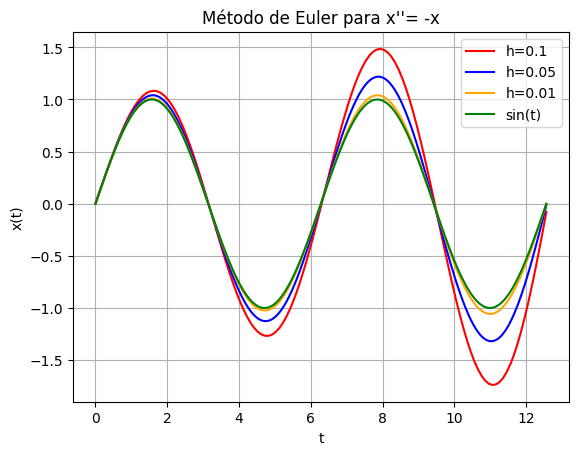

PyObject <matplotlib.legend.Legend object at 0x7f0e48d4e290>

In [31]:
# Graficando las aproximaciones a x(t) usando método de Euler explícito para diferentes valores de h

plot(R1,S1[2], label="h=0.1", color="red")
plot(R2,S2[2], label="h=0.05", color="blue")
plot(R3,S3[2], label="h=0.01", color="orange")

plot(R3,sin.(R3), label="sin(t)", color="green")

title("Método de Euler para x''= -x")
xlabel("t")
ylabel("x(t)")

grid("on")
legend()

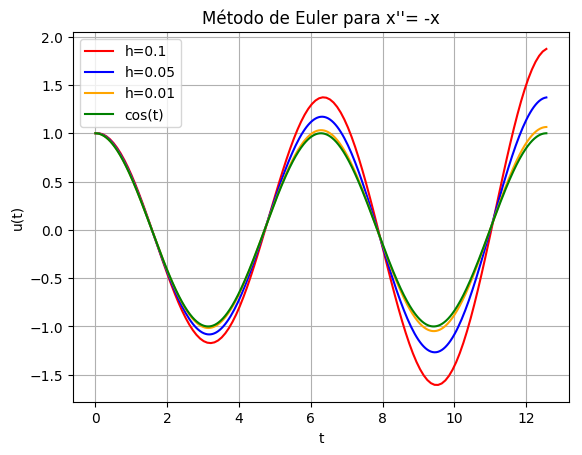

PyObject <matplotlib.legend.Legend object at 0x7f0e48c46e90>

In [32]:
# Graficando las aproximaciones de u(t) usando método de Euler explícito para diferentes valores de h

plot(S1[1],S1[3], label="h=0.1", color="red")
plot(S2[1],S2[3], label="h=0.05", color="blue")
plot(S3[1],S3[3], label="h=0.01", color="orange")

plot(R3,cos.(R3), label="cos(t)", color="green")

title("Método de Euler para x''= -x")
xlabel("t")
ylabel("u(t)")

grid("on")
legend()

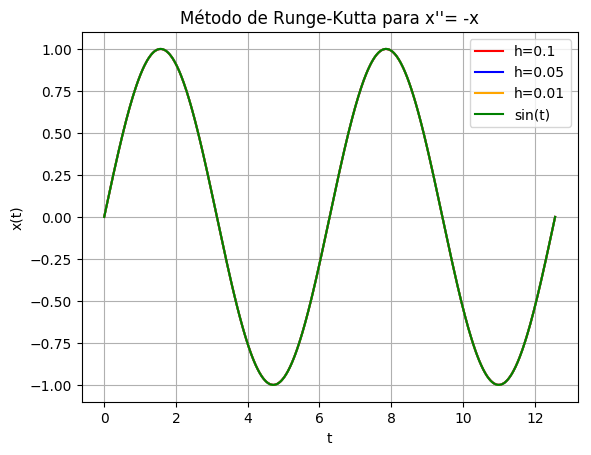

PyObject <matplotlib.legend.Legend object at 0x7f0e48b501d0>

In [33]:
# Graficando las aproximaciones a x(t) usando Runge-Kutta de orden 4 para diferentes valores de h

plot(W1[1],W1[2], label="h=0.1", color="red")
plot(W2[1],W2[2], label="h=0.05", color="blue")
plot(W3[1],W3[2], label="h=0.01", color="orange")

plot(R3,sin.(R3), label="sin(t)", color="green")

title("Método de Runge-Kutta para x''= -x")
xlabel("t")
ylabel("x(t)")

grid("on")
legend()

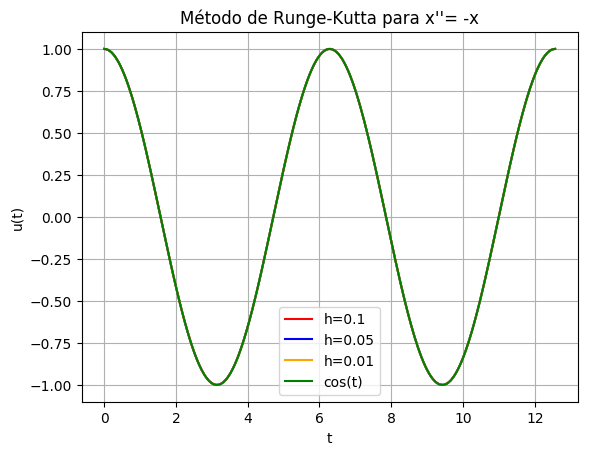

PyObject <matplotlib.legend.Legend object at 0x7f0e48a51c50>

In [34]:
# Graficando las aproximaciones de u(t) usando el método de Runge-Kutta de orden 4 para diferentes valores de h

plot(W1[1],W1[3], label="h=0.1", color="red")
plot(W2[1],W2[3], label="h=0.05", color="blue")
plot(W3[1],W3[3], label="h=0.01", color="orange")

plot(R3,cos.(R3), label="cos(t)", color="green")

title("Método de Runge-Kutta para x''= -x")
xlabel("t")
ylabel("u(t)")

grid("on")
legend()

Para ambas funciones $x(t)$ y $u(t)$, se puede observar que para los tres valores de $h$ las aproximaciones no se distinguen de la función real.

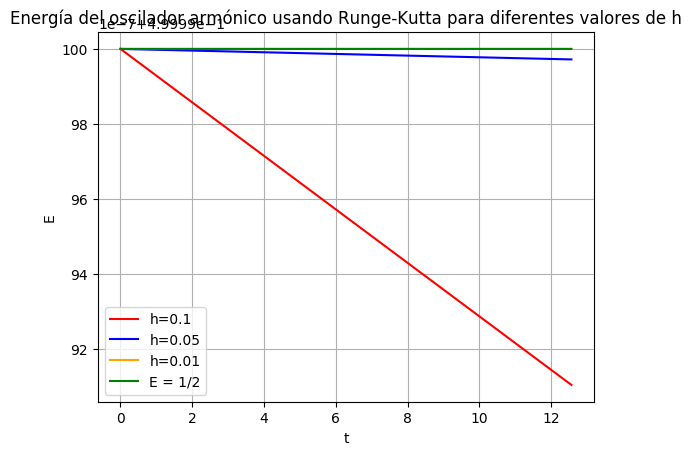

PyObject <matplotlib.legend.Legend object at 0x7f0e48947b10>

In [35]:
# Graficando las aproximaciones de E para diferentes valores de h

plot(W1[1],1/2*(W1[2].^2 + W1[3].^2), label="h=0.1", color="red")
plot(W2[1],1/2*(W2[3].^2 + W2[2].^2), label="h=0.05", color="blue")
plot(W3[1],1/2*(W3[3].^2 + W3[2].^2), label="h=0.01", color="orange")

c = 0.5*ones(length(W3[1]))
plot(W3[1],c, label="E = 1/2", color ="green")

title("Energía del oscilador armónico usando Runge-Kutta para diferentes valores de h")
xlabel("t")
ylabel("E")

grid("on")
legend()

La energía total de un sistema esta dado por $E=K+U$ donde $K$ es la energía cinética y $U$ es la energía potencial. Para el caso de un oscilador armónico, $\displaystyle U =\frac{1}{2}kx^2$. Así que, la energía total es: $$E=\frac{1}{2}mv(t)^2 + \frac{1}{2}kx(t)^2.$$ En este caso, se tomó $m=k=1$. El oscilador harmónico claramente es un sistema que conserva la energía. Evaluando en $t=0$, tenemos que la energía total es: $$E=\frac{1}{2}mv(0)^2 + \frac{1}{2}kx(0)^2 = \frac{1}{2}m(1)^2 + \frac{1}{2}k(0)^2 = \frac{1}{2}$$

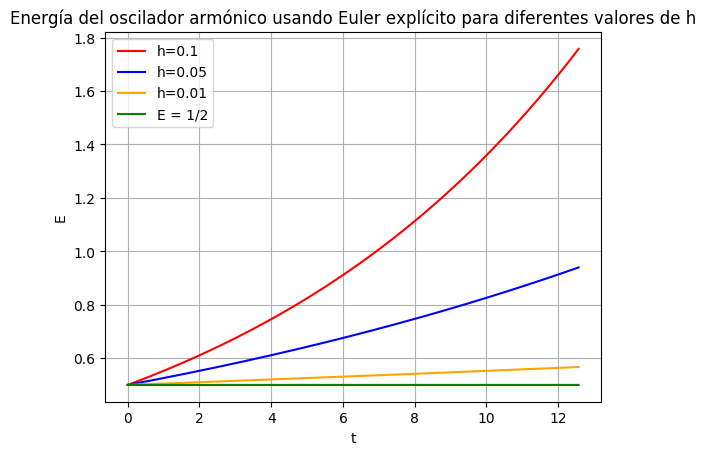

PyObject <matplotlib.legend.Legend object at 0x7f0e4883c710>

In [36]:
# Graficando las aproximaciones de E para diferentes valores de h

plot(S1[1],1/2*(S1[2].^2 + S1[3].^2), label="h=0.1", color="red")
plot(S2[1],1/2*(S2[3].^2 + S2[2].^2), label="h=0.05", color="blue")
plot(S3[1],1/2*(S3[3].^2 + S3[2].^2), label="h=0.01", color="orange")

c = 0.5*ones(length(W3[1]))
plot(W3[1],c, label="E = 1/2", color ="green")

title("Energía del oscilador armónico usando Euler explícito para diferentes valores de h")
xlabel("t")
ylabel("E")

grid("on")
legend()

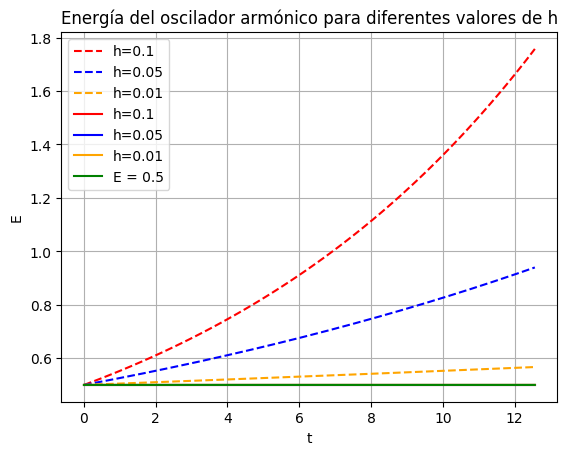

PyObject <matplotlib.legend.Legend object at 0x7f0e4874b610>

In [37]:
# Graficando las aproximaciones de E para diferentes valores de h

#  Euler explícito
plot(S1[1],1/2*(S1[2].^2 + S1[3].^2), label="h=0.1", color="red", linestyle="--")
plot(S2[1],1/2*(S2[3].^2 + S2[2].^2), label="h=0.05", color="blue", linestyle="--")
plot(S3[1],1/2*(S3[3].^2 + S3[2].^2), label="h=0.01", color="orange", linestyle="--")

# Runge-Kutta de orden 4
plot(W1[1],1/2*(W1[2].^2 + W1[3].^2), label="h=0.1", color="red")
plot(W2[1],1/2*(W2[3].^2 + W2[2].^2), label="h=0.05", color="blue")
plot(W3[1],1/2*(W3[3].^2 + W3[2].^2), label="h=0.01", color="orange")

# Valor real de la energía del sistema
c = 0.5*ones(length(W3[1]))
plot(W3[1],c, label="E = 0.5", color ="green")

title("Energía del oscilador armónico para diferentes valores de h")
xlabel("t")
ylabel("E")

grid("on")
legend()

Las tres curvas punteadas corresponden al método de Euler explítico, las tres siguientes al método de Runge-Kutta y la recta verde al valor real de la energía. Se puede observar que para el método de Runge-Kutta, las curvas no se distinguen de la recta que indica el valor real de la energía mientras que para el método de Euler explícito solamente aumenta. Se puede observar claramente que Runge-Kutta es una mejor aproximación a la función al considerar el cuadrado de las funciones que aproximamos.